### Basic data analysis or exploratory data analysis (EDA)

In [10]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
# Read Training dataset as well as drop the index column
training_data = pd.read_csv('./cs-training.csv').drop('Unnamed: 0', axis = 1)


# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(training_data.columns)):
    cleancolumn.append(training_data.columns[i].replace('-', '').lower())
training_data.columns = cleancolumn

In [13]:
# print the 5 records of the traiing dataset
training_data.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### Handle the outliers

In [14]:
training_data = training_data.fillna(training_data.median())

In [15]:
training_data.isna().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

Applying log to outliers in parameters that outliers are dominant:
-monthlyincome
-numberoftime3059dayspastduenotworse
-numberoftime6089dayspastduenotworse
-numberoftimes90dayslate
-numberofopencreditlinesandloans
-numberofdependents

In [16]:
training_data.revolvingutilizationofunsecuredlines = np.log(training_data.revolvingutilizationofunsecuredlines+1)

In [17]:
training_data.age = np.log(training_data.age+1)

In [18]:
training_data.debtratio = np.log(training_data.debtratio+1)

In [19]:
training_data.monthlyincome = np.log(training_data.monthlyincome+1)

In [20]:
training_data.numberofopencreditlinesandloans = np.log(training_data.numberofopencreditlinesandloans+1)

In [21]:
training_data.numberoftime3059dayspastduenotworse = np.log(training_data.numberoftime3059dayspastduenotworse+1)

In [22]:
training_data.numberoftime6089dayspastduenotworse = np.log(training_data.numberoftime6089dayspastduenotworse+1)

In [23]:
training_data.numberoftimes90dayslate = np.log(training_data.numberoftimes90dayslate+1)

In [24]:
training_data.numberrealestateloansorlines = np.log(training_data.numberrealestateloansorlines+1)

In [25]:
training_data.numberofdependents = np.log(training_data.numberofdependents+1)

seriousdlqin2yrs                            Axes(0.125,0.77;0.352273x0.11)
revolvingutilizationofunsecuredlines     Axes(0.547727,0.77;0.352273x0.11)
age                                        Axes(0.125,0.638;0.352273x0.11)
numberoftime3059dayspastduenotworse     Axes(0.547727,0.638;0.352273x0.11)
debtratio                                  Axes(0.125,0.506;0.352273x0.11)
monthlyincome                           Axes(0.547727,0.506;0.352273x0.11)
numberofopencreditlinesandloans            Axes(0.125,0.374;0.352273x0.11)
numberoftimes90dayslate                 Axes(0.547727,0.374;0.352273x0.11)
numberrealestateloansorlines               Axes(0.125,0.242;0.352273x0.11)
numberoftime6089dayspastduenotworse     Axes(0.547727,0.242;0.352273x0.11)
numberofdependents                          Axes(0.125,0.11;0.352273x0.11)
dtype: object

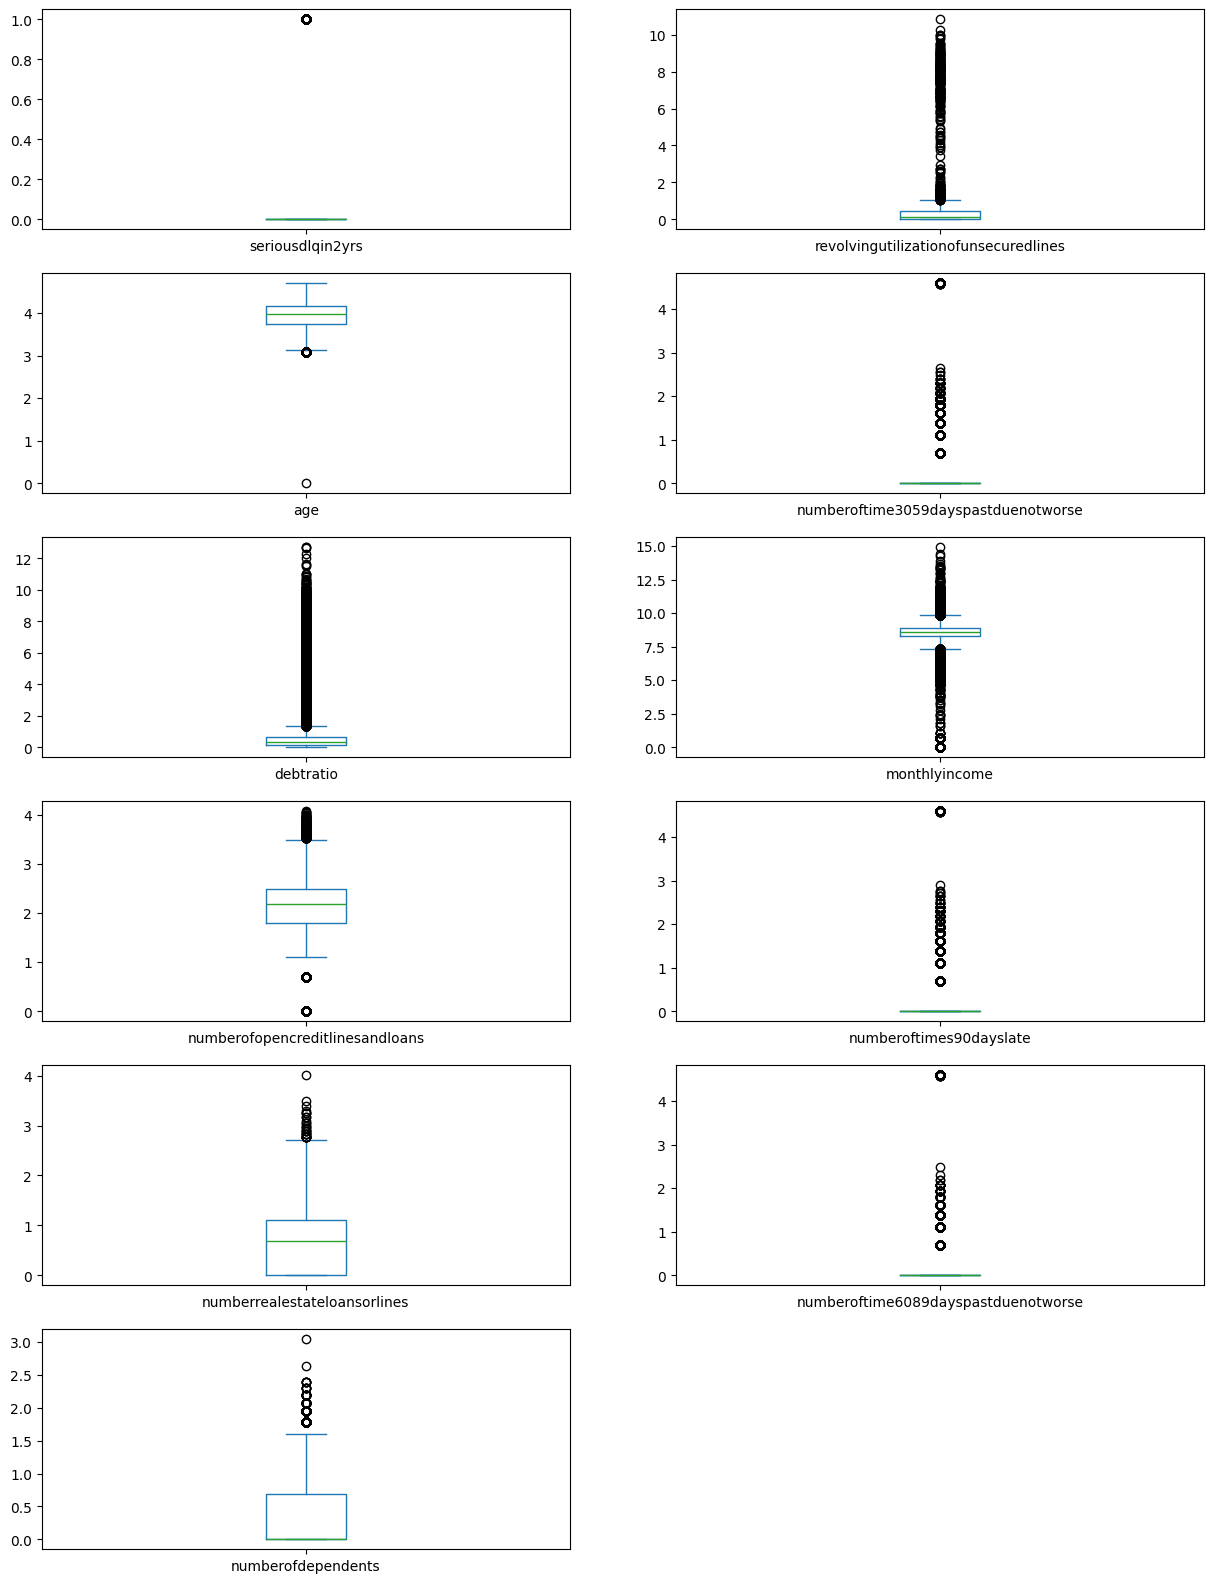

In [26]:
training_data.plot(kind="box",subplots=True,layout=(6,2),figsize=(15,20))

## Train and build baseline model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, auc, roc_curve
import lightgbm as lgb

In [28]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Gradientboosting Classifier

In [30]:
gbMod = GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [31]:
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=200)

In [32]:
gbMod.score(X_test, y_test)

0.9377333333333333

In [33]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]

In [34]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8647193060910122

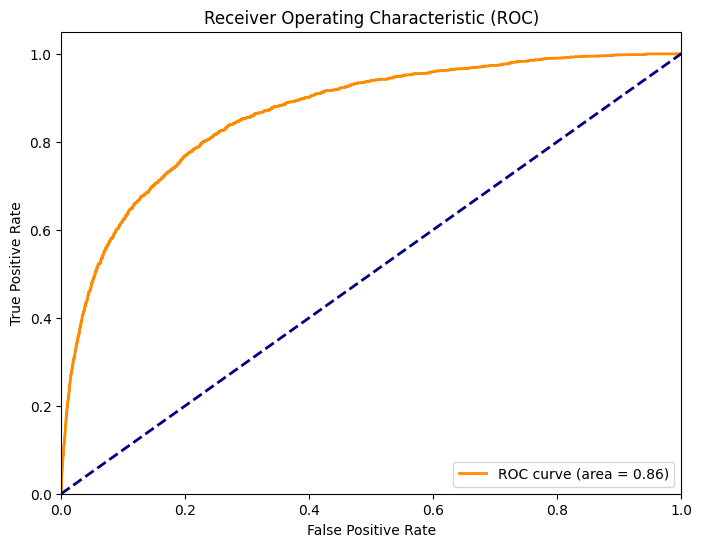

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, test_labels)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#The dashed line on an ROC curve represents a baseline that indicates 
#the performance of a classifier that makes random predictions.

#### GradientBoosting

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [38]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}

In [40]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2)

gridSearchGB.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....loss=exponential, max_depth=7, n_estimators=380; total time= 1.3min
[CV] END ....loss=exponential, max_depth=7, n_estimators=380; total time= 1.3min
[CV] END ....loss=exponential, max_depth=7, n_estimators=380; total time= 1.3min
[CV] END ....loss=exponential, max_depth=7, n_estimators=380; total time= 1.3min
[CV] END ....loss=exponential, max_depth=7, n_estimators=380; total time= 1.3min
[CV] END .......loss=deviance, max_depth=5, n_estimators=286; total time=   0.0s
[CV] END .......loss=deviance, max_depth=5, n_estimators=286; total time=   0.0s
[CV] END .......loss=deviance, max_depth=5, n_estimators=286; total time=   0.0s
[CV] END .......loss=deviance, max_depth=5, n_estimators=286; total time=   0.0s
[CV] END .......loss=deviance, max_depth=5, n_estimators=286; total time=   0.0s
[CV] END ....loss=exponential, max_depth=7, n_estimators=118; total time=  24.2s
[CV] END ....loss=exponential, max_depth=7, n_es

RandomizedSearchCV(estimator=GradientBoostingClassifier(loss='exponential',
                                                        n_estimators=200),
                   param_distributions={'loss': ['deviance', 'exponential'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x29b90c550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x29b9076d0>},
                   scoring='roc_auc', verbose=2)

In [41]:
gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', cv=None, verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....loss=exponential, max_depth=6, n_estimators=178; total time=  31.6s
[CV] END ....loss=exponential, max_depth=6, n_estimators=178; total time=  31.7s
[CV] END ....loss=exponential, max_depth=6, n_estimators=178; total time=  31.6s
[CV] END ....loss=exponential, max_depth=6, n_estimators=178; total time=  31.5s
[CV] END ....loss=exponential, max_depth=6, n_estimators=178; total time=  31.5s
[CV] END .......loss=deviance, max_depth=5, n_estimators=341; total time=   0.0s
[CV] END .......loss=deviance, max_depth=5, n_estimators=341; total time=   0.0s
[CV] END .......loss=deviance, max_depth=5, n_estimators=341; total time=   0.0s
[CV] END .......loss=deviance, max_depth=5, n_estimators=341; total time=   0.0s
[CV] END .......loss=deviance, max_depth=5, n_estimators=341; total time=   0.0s
[CV] END ....loss=exponential, max_depth=6, n_estimators=343; total time= 1.0min
[CV] END ....loss=exponential, max_depth=6, n_es

In [42]:
gridSearchGB.best_params_, gridSearchGB.best_score_

({'loss': 'exponential', 'max_depth': 6, 'n_estimators': 42},
 0.8648926980340892)

### Train models with help of new hyper parameter

In [43]:
bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train, y_train)

In [48]:
test_labels=bestGbModFitted.predict(X_test)

In [45]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.864129552855104

In [49]:
model_performance(y_test, test_labels)

Accuracy :0.9371466666666667
Precision :0.594017094017094
Recall :0.16753716351948575
F1_score :0.2613600752115324


(0.9371466666666667,
 0.594017094017094,
 0.16753716351948575,
 0.2613600752115324)

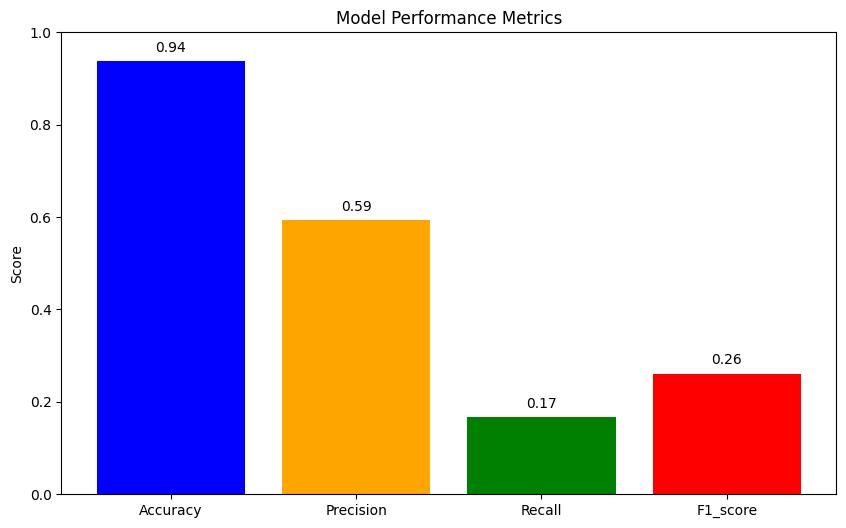

In [50]:
import matplotlib.pyplot as plt

# Performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_score']
values = [0.9371, 0.5940, 0.167537, 0.26136]

# Creating the bar plot
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red']) # You can customize the colors

plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1) # Assuming all values are between 0 and 1

# Display the values on the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center')

plt.show()


### Feature Transformation

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# Model Evaluation Function
def model_performance(y_test, y_pred) :
    #Show metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    print(f'Accuracy :{Accuracy}')
    print(f'Precision :{Precision}')
    print(f'Recall :{Recall}')
    print(f'F1_score :{F1_score}')

    return Accuracy, Precision, Recall, F1_score

#### Feature importance of final model

In [95]:
X = training_data.drop('seriousdlqin2yrs', axis=1)
y = training_data.seriousdlqin2yrs
features_label = training_data.columns[1:]
forest = RandomForestClassifier (n_estimators = 10000, random_state=0, n_jobs = -1)
forest.fit(X,y)
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.193633
 2) age                            0.180566
 3) numberoftime3059dayspastduenotworse 0.146232
 4) debtratio                      0.127389
 5) monthlyincome                  0.091034
 6) numberofopencreditlinesandloans 0.088507
 7) numberoftimes90dayslate        0.049594
 8) numberrealestateloansorlines   0.047440
 9) numberoftime6089dayspastduenotworse 0.041825
10) numberofdependents             0.033779


In [96]:
test_labels=bestGbModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [97]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8667103664848695

In [98]:
test_labels=bestAdaModFitted_transformed.predict_proba(np.array(X_test_transform))[:,1]

In [99]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8625036557274754

#### Feature importance of final model

In [107]:
features_label_1 = training_data.columns[1:]
importances_1 = bestGbModFitted.feature_importances_
indices = np. argsort(importances_1)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label_1[i],importances_1[indices[i]]))

 1) revolvingutilizationofunsecuredlines 0.459241
 2) age                            0.190310
 3) numberoftime3059dayspastduenotworse 0.104308
 4) debtratio                      0.098689
 5) monthlyincome                  0.057866
 6) numberofopencreditlinesandloans 0.027856
 7) numberoftimes90dayslate        0.024879
 8) numberrealestateloansorlines   0.018165
 9) numberoftime6089dayspastduenotworse 0.013871
10) numberofdependents             0.004814


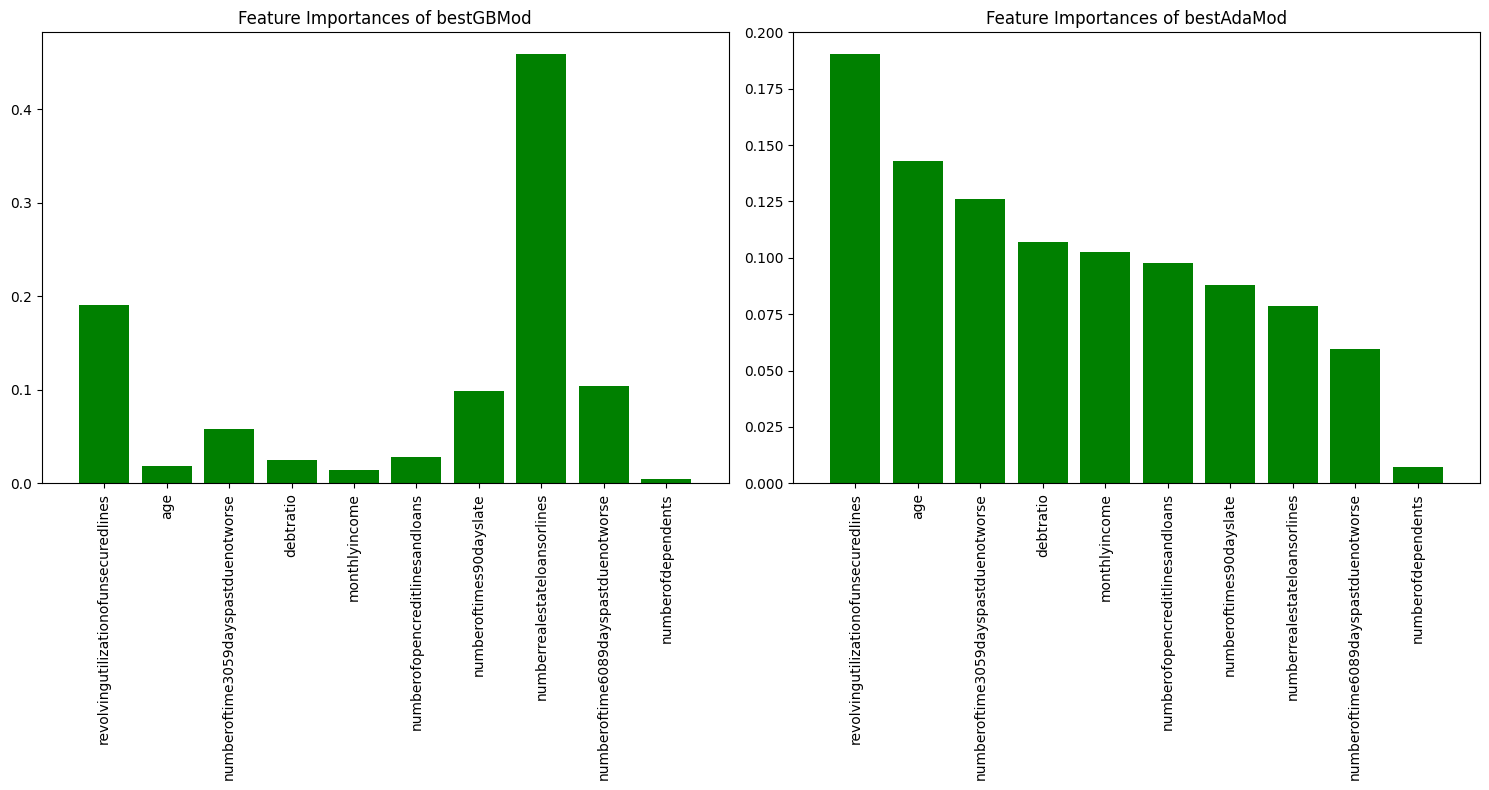

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))  # 1 row, 2 columns, and adjusting the figure size

# Plot for 'Feature Importances of bestGBMod'
ax[0].bar(range(X.shape[1]), importances_1[indices], color="green", align="center")
ax[0].set_xticks(range(X.shape[1]))
ax[0].set_xticklabels(features_label_1, rotation=90)
ax[0].set_xlim([-1, X.shape[1]])
ax[0].set_title('Feature Importances of bestGBMod')


plt.tight_layout()  # Adjust the layout to not overlap
plt.show()

### Testing on Real Test Dataset

In [110]:
# Read Training dataset as well as drop the index column
test_data = pd.read_csv('./cs-test.csv').drop('Unnamed: 0', axis = 1)
# For each column heading we replace "-" and convert the heading in lowercase 
cleancolumn = []
for i in range(len(test_data.columns)):
    cleancolumn.append(test_data.columns[i].replace('-', '').lower())
test_data.columns = cleancolumn

In [111]:
test_data.drop(['seriousdlqin2yrs'], axis=1, inplace=True)
test_data.fillna((training_data.median()), inplace=True)

In [112]:
test_labels_votingMod_old = votingMod_old.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [113]:
output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod_old})

In [114]:
output.to_csv("./predictions.csv", index=False)

In [115]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# need to transfrom the test_data because we use model with transformed model 
transformer = FunctionTransformer(np.log1p)
test_data_temp = np.array(test_data)
test_data_transform = transformer.transform(test_data_temp)

In [116]:
test_labels_votingMod = votingMod.predict_proba(np.array(test_data.values))[:,1]
print (len(test_labels_votingMod_old))

101503


In [117]:
output = pd.DataFrame({'ID':test_data.index, 'probability':test_labels_votingMod})

In [118]:
output.to_csv("./predictions_voting_Feature_transformation.csv", index=False)